In [10]:
from warnings import filterwarnings

filterwarnings("ignore")

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as geopd

In [ ]:
import os

os.chdir("/workspaces/Humanitarian-activity-analysis/")

In [12]:
mixed_information = pd.read_csv("Data/kepler.gl_project_activity_sessions_per_month.geojson.csv")

mixed_information["country"] = mixed_information["country"].apply(lambda x: str(x)[1:-1])

In [13]:
mixed_information.head()

,_geojson,project_id,status,organisation,country,time,sessions,sessions_mapped,sessions_validated,cum_sessions,cum_sessions_mapped,cum_sessions_validated
0,"{""type"":""Feature"",""properties"":{""project_id"":9...",96,0,NaN,Indonesia,2012/11/01,118,86,32,118,86,32
1,"{""type"":""Feature"",""properties"":{""project_id"":9...",99,0,NaN,Uganda,2012/11/01,12,11,0,12,11,0
2,"{""type"":""Feature"",""properties"":{""project_id"":9...",98,0,NaN,Kenya,2012/12/01,27,26,1,27,26,1
3,"{""type"":""Feature"",""properties"":{""project_id"":9...",99,0,NaN,Uganda,2012/12/01,77,53,12,89,64,12
4,"{""type"":""Feature"",""properties"":{""project_id"":1...",100,0,NaN,Chad,2012/12/01,33,33,0,33,33,0


In [14]:
mixed_information.to_csv("Data processed/final_project_activity_by_month.csv",index = False)

In [15]:
mixed_information.isna().sum()

_geojson                      0
project_id                    0
status                        0
organisation              17845
country                       0
time                          0
sessions                      0
sessions_mapped               0
sessions_validated            0
cum_sessions                  0
cum_sessions_mapped           0
cum_sessions_validated        0
dtype: int64

In [16]:
mixed_information["time"].min(),mixed_information["time"].max()

('2012/11/01', '2023/01/01')

In [17]:
group_mixed_info = mixed_information.groupby(by = "country").sum().sort_values(by = "sessions",ascending=False)

group_mixed_info.head()

,project_id,status,sessions,sessions_mapped,sessions_validated,cum_sessions,cum_sessions_mapped,cum_sessions_validated
country,,,,,,,,
Tanzania,19092604,742,1178181,522755,297400,7837532,3292759,976264
Guatemala,21947140,985,658050,354886,161240,2153968,1250724,291933
Nigeria,33300396,511,640612,234645,119703,5208211,1781295,537558
Zambia,10778197,331,625396,318308,194868,2006515,1048991,409673
Indonesia,12444585,113,611139,217821,86436,6967934,2460535,691160


<AxesSubplot: xlabel='country'>

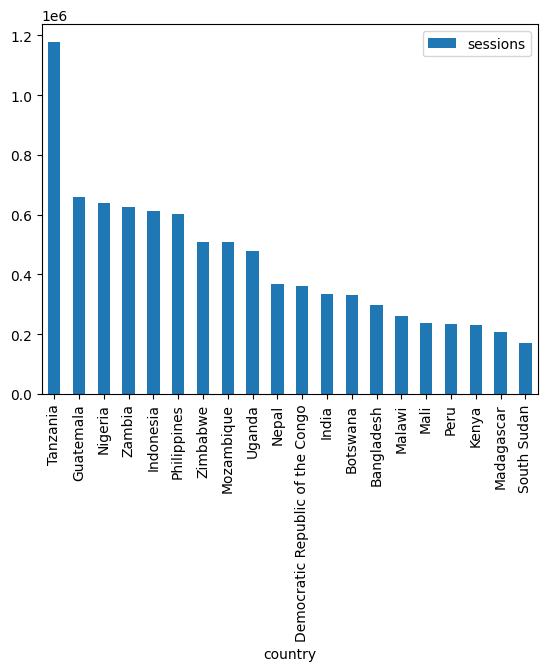

In [18]:
group_mixed_info.iloc[:20].plot(kind= "bar",y="sessions")

<AxesSubplot: xlabel='country'>

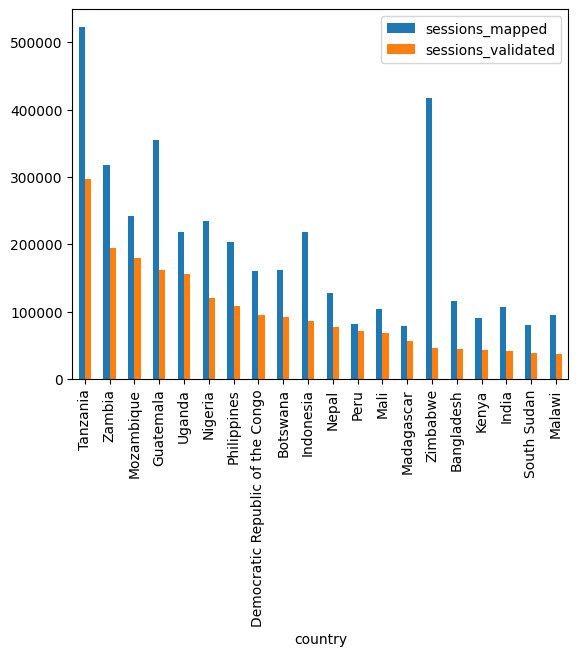

In [19]:
group_mixed_info.iloc[:20][["sessions_mapped","sessions_validated"]].sort_values(by="sessions_validated",ascending=False).plot(kind= "bar")

# Check causality between session mapped 

In [20]:
#! pip install dowhy